# HW #7 Neural Networks

In this HW, we'll be exploring a visual proof of the universal approximation theorem and building (from scratch) a neural network that will approximate a pretty ridiculous function.

Head over to [this site](http://neuralnetworksanddeeplearning.com/chap4.html) and read from the beginning of the page until the "Many Input Variables" section. (You do not need to read the "Many Input Variables" section and beyond but are certainly welcome to do so!) You'll read the introduction, the "Two Caveats" section, and the "Universality with One Input and One Output" section.

Your answers to problems 1-5 should come from directly this reading.

**Problem 1**: Summarize the Universal Approximation Theorem. (Don't copy it; use your own words!)

In [0]:
# The Universal Approximation theorem is having an algorithm ability in approximating any arbitary function in the universe.
# Genrally, neural networks are known as Universal Approximators. So a neural network with single hidden layer with n-no.of neurons gains the ability in approximating any function.
# In simple way universality means ability to do anything. Neural networks had powerful combination of both learning function and universality. The neural network architecture provides
# these kind of feasibilities.

**Problem 2**: Summarize the two caveats the author uses to describe the statement "a neural network can compute any function."

In [0]:
# By having of sufficient hidden neurons in the hidden layer, neural networks can gain the ability in producing desired output with the desired accuracy.
# Neural networks are majorty having of continuous function, even if there is discontinuous function the neural network continuous function can approximate that. 

**Problem 3:** For a sigmoidal activation function to closely resemble a step function, how would you describe the value of $w$? What constraints exist on the value of $b$? How do we calculate $s$? What does the value of $s$ indicate?

Try playing around with the applets on [this site](http://neuralnetworksanddeeplearning.com/chap4.html) to test how different parts of the perceptron affect the output. This should be helpful in answering the questions above.

**Answer**: 
  As the weights (w)  should be set to high value. If the bias (b) value keeps decreasing or incresing there is no change in the shape of the graph. by adjusting bias we can set up the starting position of step funtion.
The "S" can be calclated as -(bias(b)/weights(w)). The value of S indicates the position of the step.


**Problem 4**: When the author wants us to approximate $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ with a neural network, the function on the applet where we manipulate the values of $h_i$ is not $f(x)$. It's a different function. What is this function, and where on the feedforward Neural Network is can the vaule of this function be collected?

** Answer **:  It is the actual function that the neural network is calculating. The function  corresponds over the weighted combination of the outputs from the hidden layers towards the output. The value of the function can be seen on the output layer. Since the outputs of all hidden layers are contributed towards the final output layer in our network. It is deciding function in getting of true outputs from the data.

**Problem 5**: The author asks you to find values of $h_i$ that make your neural network closely approximate $\sigma^{-1}\circ f(x)$. Record your values of $h_i$ here and your best "average deviation" score. Let's name the $h$s from top to bottom on the graph as $h_1$, $h_2$ ,,,, $h_5$,

In [0]:
# h1 = -1.2, h2 = -1.4, h3= -0.3, h4=-0.9, h5=1.3 , optimal average deviation = 0.38

**Problem 6**: Build the neural network from your work in Problem 5 here with MLPClassifier.

A few things to keep in mind:
* How many inputs are there? 
* How many outputs are there?
* How many neurons are in the hidden layer?


In [0]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [0]:
X = pd.DataFrame(np.linspace(0,1,1000))
y = pd.DataFrame(0.2 + 0.4 * X**2 + 0.3 * X * np.sin(15*X) + 0.05 * np.cos(50*X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# activation = relu
mlp = MLPRegressor(hidden_layer_sizes=10, learning_rate_init=0.091, random_state=0)
mlp.fit(X_train,y_train)
accuracy = mlp.score(X_test,y_test)
y_pred = mlp.predict(X)
MSE = mean_squared_error(y, y_pred)
print("Accuracy: {}".format(accuracy,MSE))
print("MSE: {}".format(MSE))

Accuracy: 0.8182586909073631
MSE: 0.008273983854967458


**Problem 7**: Once you've built the neural network with the structure described in Problem 6, use `np.linspace` to generate 1000 values of $x$ between 0 and 1 and estimate the performance of your neural network using mean squared error.

Recall that mean squared error(MSE) is given by:

$$
\frac{1}{n}\sum_{i=1}^n (\hat{y}-y)^2
$$


* Your $\hat{y}$ in this case are your predicted values from your neural network for each of the $x$ that you generated using `np.linspace`. Make sure to take into account the final activation function!
* Your $y$ values are the actual observed values of $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ for each of the $x$ that you generated using `np.linspace`.
* Use  [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) for this work.
* Plot  $f(x)$ curve overlapped with the curve predicted by your trained Neural Networks for x between 0 and 1
* Try different learning rates

In [0]:
y_pred = mlp.predict(X)
MSE = mean_squared_error(y,y_pred)
print(MSE)

0.008273983854967458


In [0]:
def plot_hyper_param_plots(x, y, y_pred, xlabel):
    plt.plot(x, y, label='actual')
    plt.plot(x, y_pred, label='predicted')
    plt.xlabel(xlabel)
    plt.ylabel('Test Accuracy')
    plt.legend(loc='upper left')

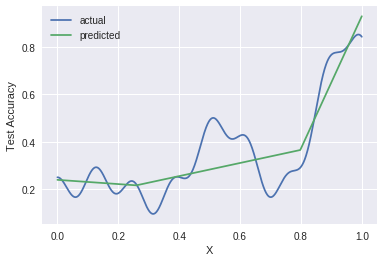

In [0]:
plot_hyper_param_plots(X, y, y_pred, "X")

In [0]:
MSE_list = {}
for alpha in np.arange(0.001,0.3,0.01):
  mlp = MLPRegressor(hidden_layer_sizes=10,activation='relu', learning_rate_init=alpha, random_state=0)
  mlp.fit(X_train,y_train)
  accuracy = mlp.score(X_test,y_test)
  y_hat = mlp.predict(X)
  MSE = mean_squared_error(y, y_pred)
  MSE_list[alpha]= MSE
  print("The learning rate is : {} and the MSE is : {}".format(round(alpha,3) , round(MSE,4)))
print()
print(" The minimum value for MSE is at learning rate: ", min(MSE_list.items(), key=lambda x: x[1]) )

The learning rate is : 0.001 and the MSE is : 0.0083
The learning rate is : 0.011 and the MSE is : 0.0083
The learning rate is : 0.021 and the MSE is : 0.0083
The learning rate is : 0.031 and the MSE is : 0.0083
The learning rate is : 0.041 and the MSE is : 0.0083
The learning rate is : 0.051 and the MSE is : 0.0083
The learning rate is : 0.061 and the MSE is : 0.0083
The learning rate is : 0.071 and the MSE is : 0.0083
The learning rate is : 0.081 and the MSE is : 0.0083
The learning rate is : 0.091 and the MSE is : 0.0083
The learning rate is : 0.101 and the MSE is : 0.0083
The learning rate is : 0.111 and the MSE is : 0.0083
The learning rate is : 0.121 and the MSE is : 0.0083
The learning rate is : 0.131 and the MSE is : 0.0083
The learning rate is : 0.141 and the MSE is : 0.0083
The learning rate is : 0.151 and the MSE is : 0.0083
The learning rate is : 0.161 and the MSE is : 0.0083
The learning rate is : 0.171 and the MSE is : 0.0083
The learning rate is : 0.181 and the MSE is : 

**Problem 8**: Suppose you wanted to increase the performance of this neural network. How might you go about doing so?
* You try different number of hidden layers and different number of neurons in each hidden layer.
* Report your best Neural Network structure and the minimum MSE you can get.

In [0]:
# Test with different number of hidden layers and different learning rates on each hidden layer
def train_mlp(units, activation='relu', lr=0.071, batch_size=1000,loss_curve=False):
    
    mlp = MLPRegressor(hidden_layer_sizes=units, activation=activation, batch_size=batch_size, momentum=0.0, learning_rate_init=lr, random_state=0)
    
    mlp.fit(X_train, y_train)
    accuracy = mlp.score(X_test,y_test)
    
    y_pred = mlp.predict(X)

    MSE = mean_squared_error(y,y_hat)
    
    return MSE


In [0]:
for units in range(5,110,5):
  print(train_mlp(units), units)

0.0168377700454656 5
0.0168377700454656 10
0.0168377700454656 15
0.0168377700454656 20
0.0168377700454656 25
0.0168377700454656 30
0.0168377700454656 35
0.0168377700454656 40
0.0168377700454656 45
0.0168377700454656 50
0.0168377700454656 55
0.0168377700454656 60
0.0168377700454656 65
0.0168377700454656 70
0.0168377700454656 75
0.0168377700454656 80
0.0168377700454656 85
0.0168377700454656 90
0.0168377700454656 95
0.0168377700454656 100
0.0168377700454656 105


In [0]:
import itertools
for i,j in itertools.product(range(10,50,10), range(10,50,10)):
  units = i,j
  print(units)
  print(train_mlp(units))

(10, 10)
0.0168377700454656
(10, 20)
0.0168377700454656
(10, 30)
0.0168377700454656
(10, 40)
0.0168377700454656
(20, 10)
0.0168377700454656
(20, 20)
0.0168377700454656
(20, 30)
0.0168377700454656
(20, 40)
0.0168377700454656
(30, 10)
0.0168377700454656
(30, 20)
0.0168377700454656
(30, 30)
0.0168377700454656
(30, 40)
0.0168377700454656
(40, 10)
0.0168377700454656
(40, 20)
0.0168377700454656
(40, 30)
0.0168377700454656
(40, 40)
0.0168377700454656


In [0]:
num_hidden_units = range(10, 1000, 50)
all_test_accuracy = []
for units in num_hidden_units: 
    MSE = train_mlp((units,))
    print ("Units: {}, MSE: {}".format(units, MSE))
    all_test_accuracy.append(MSE)

Units: 10, MSE: 0.0168377700454656
Units: 60, MSE: 0.0168377700454656
Units: 110, MSE: 0.0168377700454656
Units: 160, MSE: 0.0168377700454656
Units: 210, MSE: 0.0168377700454656
Units: 260, MSE: 0.0168377700454656
Units: 310, MSE: 0.0168377700454656
Units: 360, MSE: 0.0168377700454656
Units: 410, MSE: 0.0168377700454656
Units: 460, MSE: 0.0168377700454656
Units: 510, MSE: 0.0168377700454656
Units: 560, MSE: 0.0168377700454656
Units: 610, MSE: 0.0168377700454656
Units: 660, MSE: 0.0168377700454656
Units: 710, MSE: 0.0168377700454656
Units: 760, MSE: 0.0168377700454656
Units: 810, MSE: 0.0168377700454656
Units: 860, MSE: 0.0168377700454656
Units: 910, MSE: 0.0168377700454656
Units: 960, MSE: 0.0168377700454656


In [0]:
units = num_hidden_units[np.argmin(all_test_accuracy)]
optimum_depth = []

for depth in range(1, 11):
    MSE = train_mlp((units,)*depth)
    optimum_depth.append(MSE)
    print ("No. of Neurons: {} , Depth of the Network: {}, Mean Squared Error: {}".format(units,depth, MSE))

No. of Neurons: 10 , Depth of the Network: 1, Mean Squared Error: 0.0168377700454656
No. of Neurons: 10 , Depth of the Network: 2, Mean Squared Error: 0.0168377700454656
No. of Neurons: 10 , Depth of the Network: 3, Mean Squared Error: 0.0168377700454656
No. of Neurons: 10 , Depth of the Network: 4, Mean Squared Error: 0.0168377700454656
No. of Neurons: 10 , Depth of the Network: 5, Mean Squared Error: 0.0168377700454656
No. of Neurons: 10 , Depth of the Network: 6, Mean Squared Error: 0.0168377700454656
No. of Neurons: 10 , Depth of the Network: 7, Mean Squared Error: 0.0168377700454656
No. of Neurons: 10 , Depth of the Network: 8, Mean Squared Error: 0.0168377700454656
No. of Neurons: 10 , Depth of the Network: 9, Mean Squared Error: 0.0168377700454656
No. of Neurons: 10 , Depth of the Network: 10, Mean Squared Error: 0.0168377700454656
